<div style="background: linear-gradient(135deg, #2c3e50 0%, #3498db 100%); padding: 40px; border-radius: 15px; text-align: center; margin: 20px 0;">
    <h1 style="color: #ecf0f1; font-size: 2.5em; margin-bottom: 10px;">🏠 House Price Prediction</h1>
    <h3 style="color: #ffffff; font-weight: 300;">Machine Learning Regression Project</h3>
    <hr style="border: 1px solid #ecf0f1; width: 50%; margin: 20px auto;">
    <p style="color: #bdc3c7; font-size: 1.1em; margin-bottom: 5px;">California Housing Dataset</p>
    <p style="color: #bdc3c7; margin-top: 0;">Linear Regression | Random Forest | Gradient Boosting</p>
</div>

# DATASET INFORMATION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# DATASET STORY
# 1. Date of creation: 1997 (derived from 1990 US Census)
# 2. Who created it: Pace, R. Kelley and Ronald Barry
# 3. Source: StatLib repository, Carnegie Mellon University
# 4. Purpose: Predict median house values in California districts
# 5. Why this dataset:
#    - Real-world housing data
#    - Good for regression problems
#    - Contains geographical and demographic features
#    - Widely used for learning ML regression techniques

In [3]:
# Load the California Housing dataset from CSV
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Display first 10 rows
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
# FEATURE EXPLANATION
# 
# 9 Features + 1 Target variable:
#
# INDEPENDENT VARIABLES (Features):
# a) longitude          - Block group longitude
# b) latitude           - Block group latitude
# c) housing_median_age - Median house age in block group (years)
# d) total_rooms        - Total number of rooms in block group
# e) total_bedrooms     - Total number of bedrooms in block group
# f) population         - Block group population
# g) households         - Total number of households in block group
# h) median_income      - Median income in block group (in $10,000s)
# i) ocean_proximity    - Location relative to ocean (categorical)
#
# DEPENDENT VARIABLE (Target):
# median_house_value - Median house value (in $)
#
# Note: This is a REGRESSION problem (predicting continuous values)
#       unlike the Heart Disease project which was CLASSIFICATION

In [5]:
# Dataset structure and info
df.info()

# Observations:
# - 20,640 entries (much larger than Heart Disease dataset)
# - 10 columns (9 features + 1 target)
# - Most features are float64 (numerical)
# - ocean_proximity is categorical (object type)
# - total_bedrooms has some missing values
# - Memory usage: ~1.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Statistical summary
df.describe().round(2)

# Observations:
# - median_income: ranges from 0.5 to 15 ($5,000 to $150,000 median income)
# - housing_median_age: ranges from 1 to 52 years
# - total_rooms: varies widely across block groups
# - population: varies widely (3 to 35,682)
# - median_house_value: target ranges from $14,999 to $500,001
# - Large std in population suggests outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


# STATISTICAL QUESTIONS

In [7]:
# QUESTION 1: What is the average median house value?
avg_price = df['median_house_value'].mean().round(2)
print(f"Average Median House Value: ${avg_price:,.0f}")

# The average house value is approximately $206,000

Average Median House Value: $206,856


In [8]:
# QUESTION 2: What is the correlation between median income and house value?
correlation = df['median_income'].corr(df['median_house_value']).round(3)
print(f"Correlation between Income and House Value: {correlation}")

# Strong positive correlation (~0.69) - higher income areas have more expensive houses

Correlation between Income and House Value: 0.688


In [13]:
# QUESTION 3: How many houses are older than 30 years?
old_houses = df[df['housing_median_age'] > 30].shape[0]
percentage = (old_houses / len(df) * 100).__round__(2)
print(f"Houses older than 30 years: {old_houses} ({percentage}%)")

# Significant portion of housing stock is older

Houses older than 30 years: 9495 (46.0%)


In [15]:
# QUESTION 4: What is the median number of rooms per block group?
median_rooms = df['total_rooms'].median().__round__(2)
print(f"Median total rooms per block group: {median_rooms}")

# Typical California block group has about 2127 total rooms

Median total rooms per block group: 2127.0


In [17]:
# QUESTION 5: Group by house age ranges and see average house values
df['AgeGroup'] = pd.cut(df['housing_median_age'], bins=[0, 10, 20, 30, 40, 52], 
                        labels=['0-10', '11-20', '21-30', '31-40', '41-52'])
age_group_prices = df.groupby('AgeGroup')['median_house_value'].mean().__round__(2)
print("Average House Value by Age Group:")
print(age_group_prices)

# Interesting: Older houses are not necessarily cheaper
# Location matters more than age in California

Average House Value by Age Group:
AgeGroup
0-10     200263.25
11-20    191181.63
21-30    206801.59
31-40    206662.17
41-52    228965.01
Name: median_house_value, dtype: float64


/var/folders/6z/txrkxyv92ml1fd30xg5xr3nm0000gn/T/ipykernel_91298/2640530996.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_prices = df.groupby('AgeGroup')['median_house_value'].mean().__round__(2)


In [18]:
# Remove the temporary AgeGroup column
df = df.drop('AgeGroup', axis=1)

# VISUALIZATION

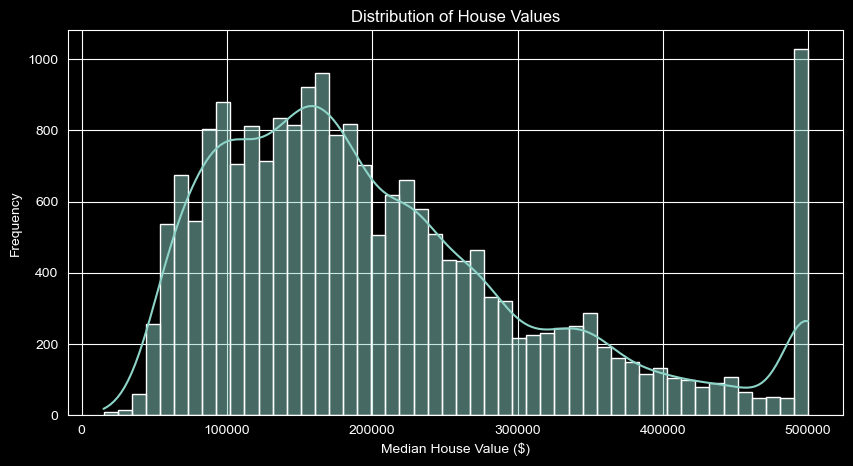

In [19]:
# Distribution of Target Variable (House Values)
plt.figure(figsize=(10, 5))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.title('Distribution of House Values')
plt.show()

# Comment: The distribution is right-skewed with a cap at $500,001
# Many houses are capped at the maximum value, which may affect model performance

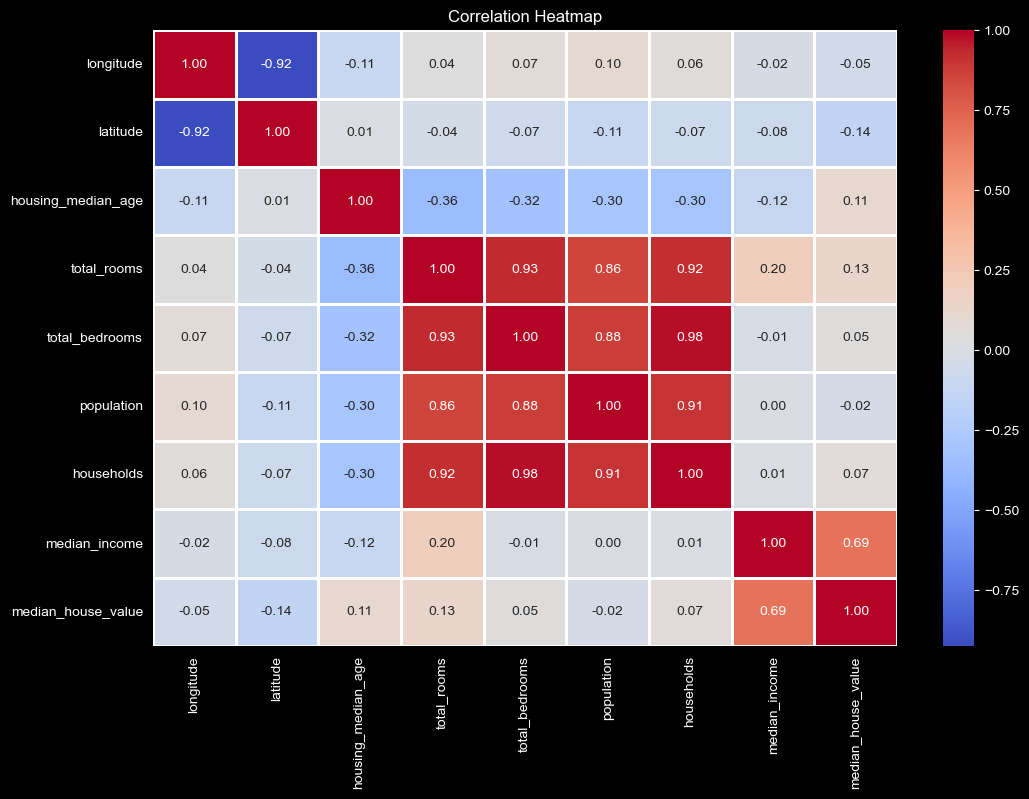

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidth=1)
plt.title('Correlation Heatmap')
plt.show()

# Comment: median_income has strongest correlation with median_house_value (~0.69)
# total_rooms and total_bedrooms are highly correlated with each other
# Latitude and Longitude show correlations with house value
# (houses in southern California tend to be more expensive)

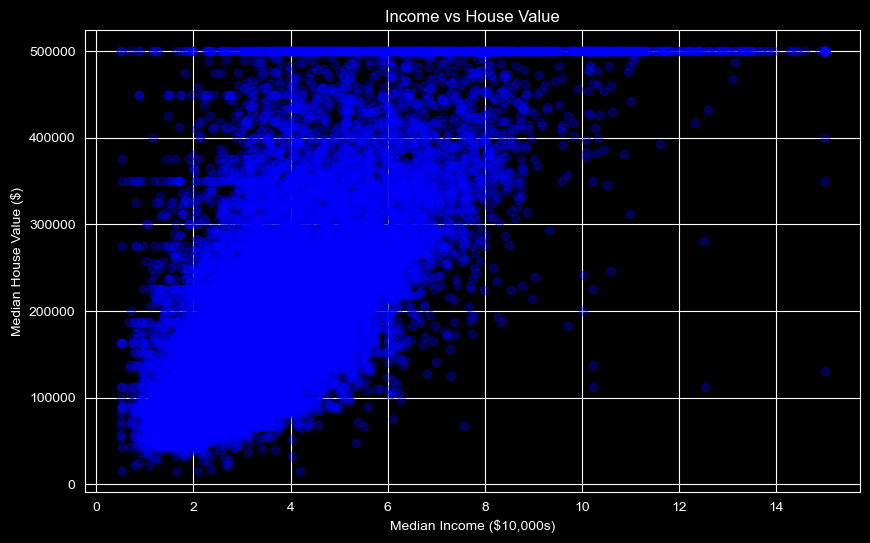

In [21]:
# Scatter plot: Income vs House Value
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3, c='blue')
plt.xlabel('Median Income ($10,000s)')
plt.ylabel('Median House Value ($)')
plt.title('Income vs House Value')
plt.show()

# Comment: Clear positive relationship between income and house value
# Visible cap at median_house_value = $500,001 (maximum recorded value)
# Higher income areas have more expensive houses

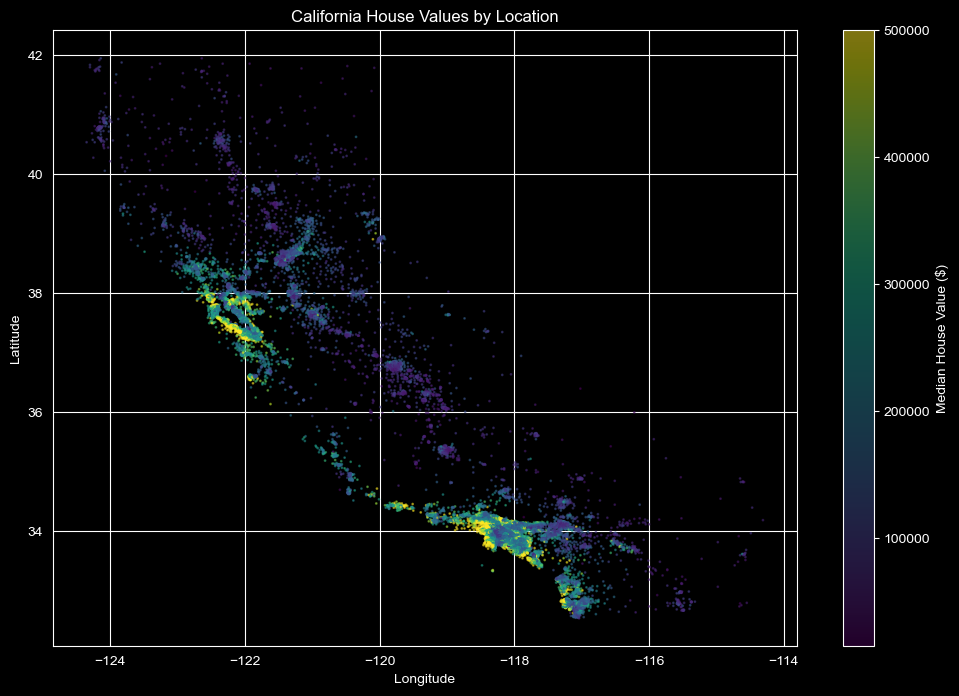

In [22]:
# Geographical visualization
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], 
            cmap='viridis', alpha=0.5, s=1)
plt.colorbar(label='Median House Value ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California House Values by Location')
plt.show()

# Comment: This plot shows California's geography
# Coastal areas (especially Bay Area and LA) have higher values (yellow)
# Inland areas have lower values (purple)
# Location is a key factor in house prices

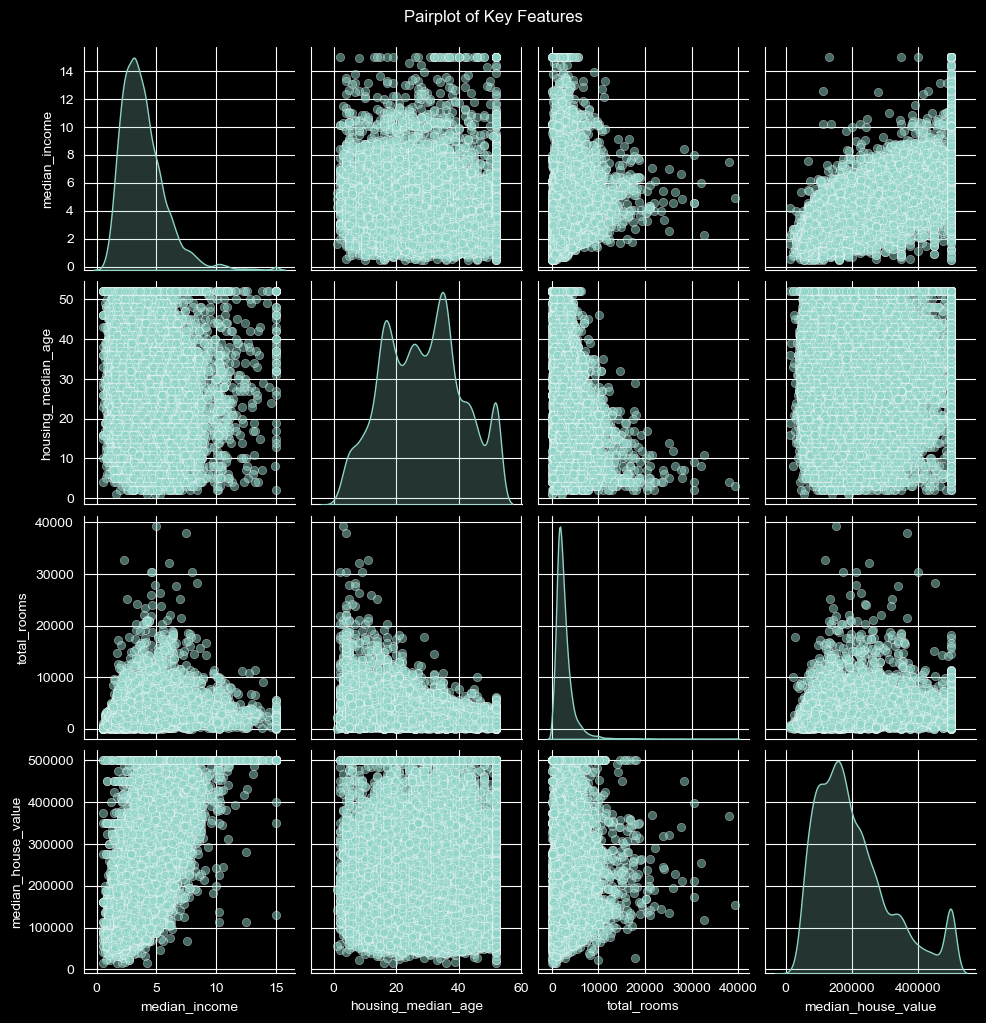

In [23]:
# Pairplot for key features
sns.pairplot(df[['median_income', 'housing_median_age', 'total_rooms', 'median_house_value']].dropna(), 
             diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

# Comment: Visualizes relationships between key features
# median_income shows strongest linear relationship with median_house_value
# total_rooms has some outliers visible in the scatter plots

# OUTLIER DETECTION AND HANDLING

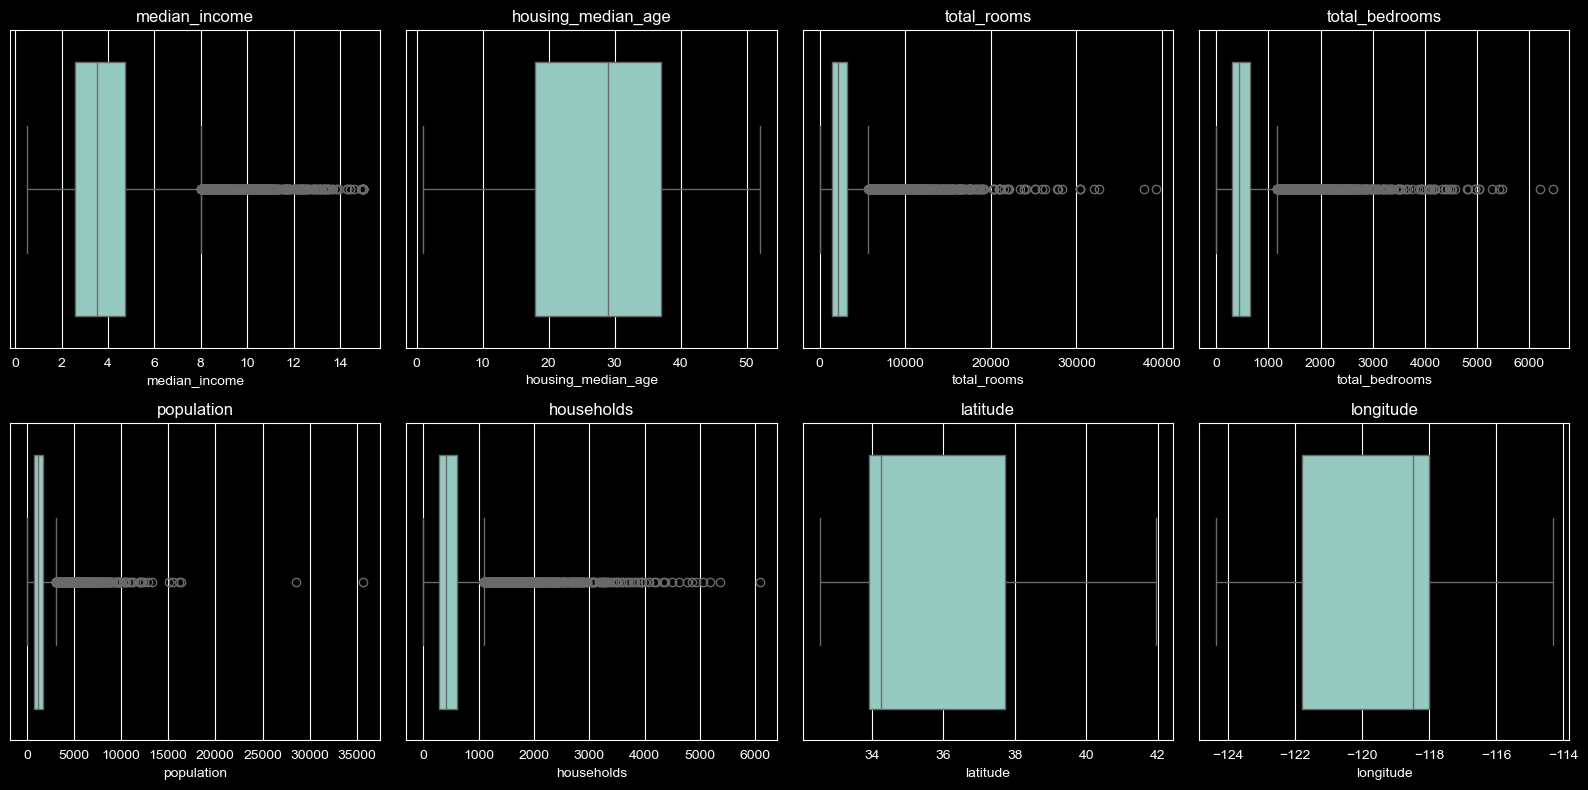

In [24]:
# Boxplots to visualize outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
columns = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
           'population', 'households', 'latitude', 'longitude']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

# Comment: Significant outliers visible in:
# - total_rooms (extreme values)
# - total_bedrooms (extreme values)
# - population (very high values)
# - households (extreme values)

In [25]:
# Function to handle outliers using IQR method
def handle_outliers(df, column, method='cap'):
    """
    Handle outliers using IQR method
    
    Methods:
    - 'cap': Clip values to min/max thresholds
    - 'median': Replace outliers with median
    - 'mean': Replace outliers with mean
    - 'remove': Remove rows with outliers
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR
    
    outlier = (df[column] < minimum) | (df[column] > maximum)
    print(f"{column}: {outlier.sum()} outliers found")
    
    if method == 'cap':
        df[column] = df[column].clip(minimum, maximum)
    elif method == 'median':
        median = df[~outlier][column].median()
        df.loc[outlier, column] = median
    elif method == 'mean':
        mean = df[~outlier][column].mean()
        df.loc[outlier, column] = mean
    elif method == 'remove':
        df = df[~outlier]
    
    return df

In [26]:
# Handle outliers in each column using different methods
print("Handling outliers...\n")

# Cap method for rooms and bedrooms (keep all data, limit extremes)
df = handle_outliers(df, 'total_rooms', method='cap')
df = handle_outliers(df, 'total_bedrooms', method='cap')

# Median method for population (robust to skewness)
df = handle_outliers(df, 'population', method='median')

# Cap method for households
df = handle_outliers(df, 'households', method='cap')

print("\nOutliers handled successfully!")

Handling outliers...

total_rooms: 1287 outliers found
total_bedrooms: 1271 outliers found
population: 1196 outliers found
households: 1220 outliers found

Outliers handled successfully!


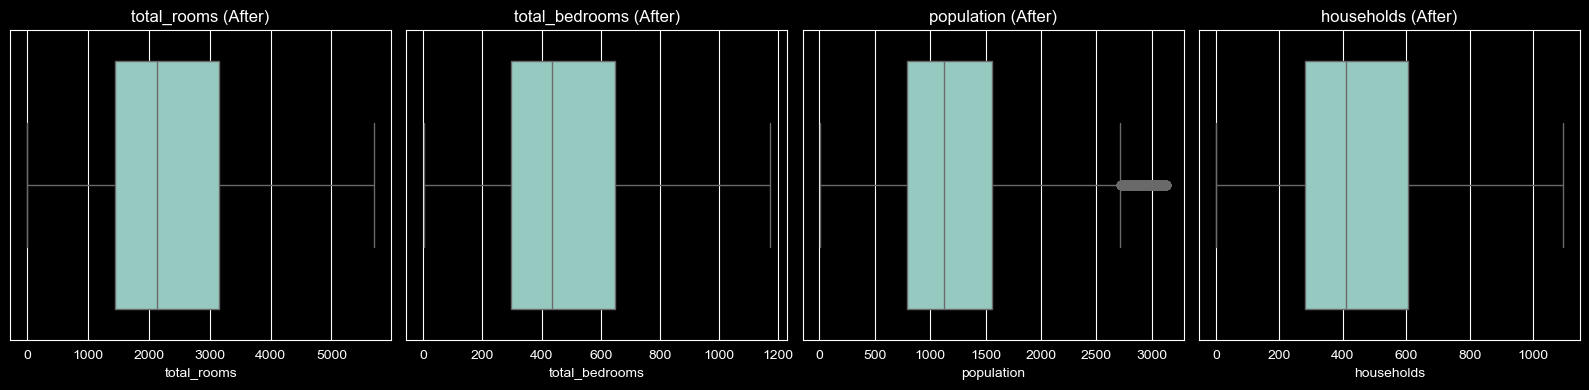

In [27]:
# Verify outlier handling with boxplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
columns_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households']

for i, col in enumerate(columns_to_check):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} (After)')

plt.tight_layout()
plt.show()

# Comment: Outliers have been handled - distributions are now more reasonable

# MISSING VALUE HANDLING

In [28]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Comment: total_bedrooms has some missing values
# We will handle these before model training

Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total missing values: 207


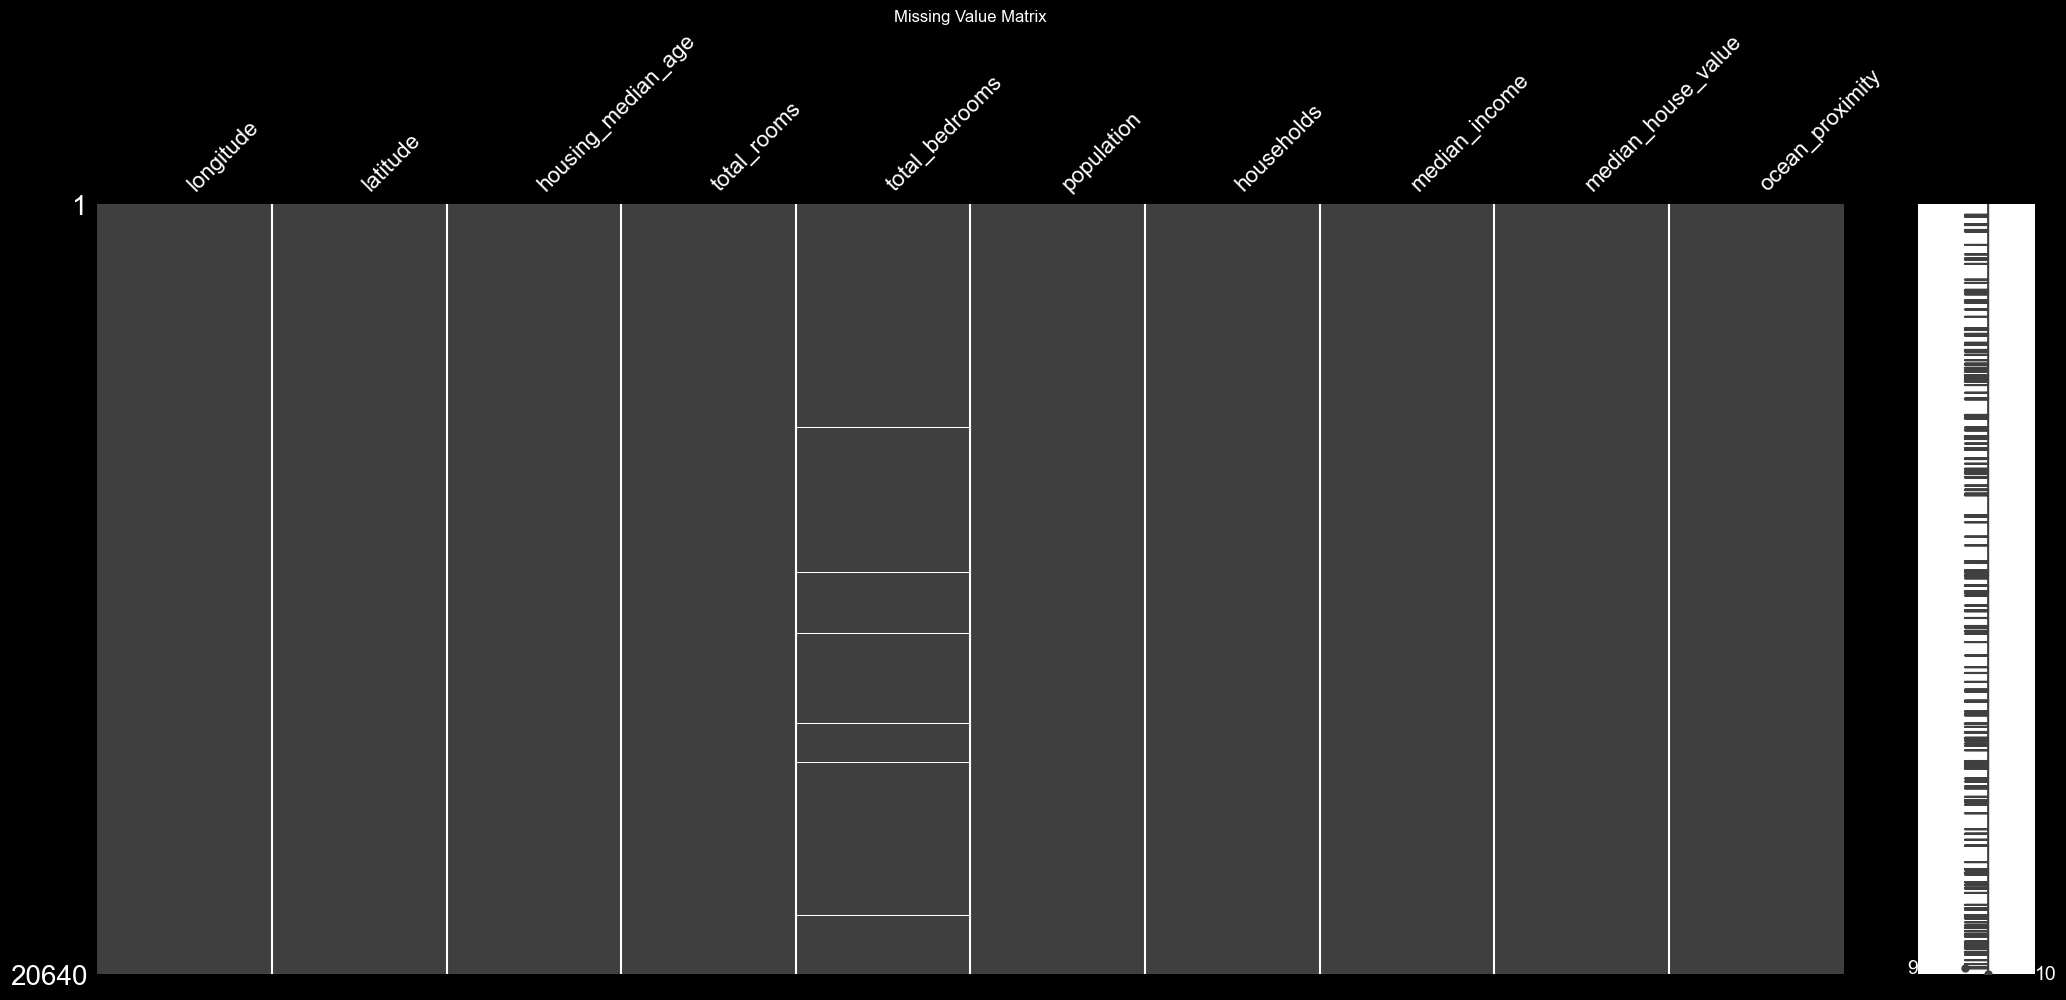

Missing values after handling: 0


In [29]:
# Visualize missing values
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

# Handle missing values in total_bedrooms with median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Verify no missing values remain
print(f"Missing values after handling: {df.isnull().sum().sum()}")

# REGRESSION MODELS

In [30]:
# Separate features (X) and target (y)
# First, encode the categorical variable 'ocean_proximity'
le = LabelEncoder()
df['ocean_proximity_encoded'] = le.fit_transform(df['ocean_proximity'])

# Drop original categorical column and target
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (20640, 9)
Target shape: (20640,)

Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_encoded']


In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 16512 samples
Testing set: 4128 samples


In [32]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


In [33]:
# Function to evaluate regression models
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate regression model performance
    
    Metrics:
    - RMSE: Root Mean Squared Error (lower is better)
    - MAE: Mean Absolute Error (lower is better)
    - R²: Coefficient of Determination (higher is better, max 1.0)
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'model': model_name, 'rmse': rmse, 'mae': mae, 'r2': r2}

## 1. Linear Regression

In [34]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Comment: Linear Regression provides a baseline performance
# R² of ~0.60 means model explains 60% of variance in house prices


Linear Regression Results:
  RMSE: 73405.2632
  MAE:  53452.7228
  R²:   0.5888


In [35]:
# Feature importance for Linear Regression (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Importance (Linear Regression):")
print(feature_importance_lr)

# Comment: MedInc has highest positive coefficient - strongest predictor
# Latitude has negative coefficient - northern areas tend to be cheaper

Feature Importance (Linear Regression):
                   Feature   Coefficient
1                 latitude -89438.643553
0                longitude -85887.239549
7            median_income  81250.811942
4           total_bedrooms  71686.336994
3              total_rooms -27166.804860
6               households -22767.200806
2       housing_median_age  16680.743976
5               population -15029.992662
8  ocean_proximity_encoded    268.896013


## 2. Random Forest Regressor

In [36]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Comment: Random Forest typically outperforms Linear Regression
# Can capture non-linear relationships in the data


Random Forest Results:
  RMSE: 50303.6603
  MAE:  32417.8094
  R²:   0.8069


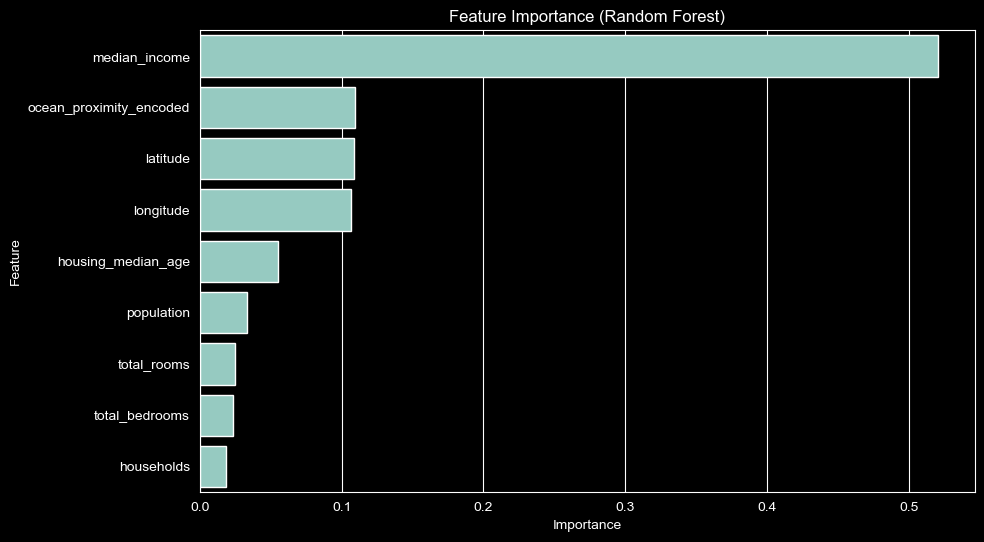

In [37]:
# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Comment: MedInc is by far the most important feature
# Location features (Lat/Long) are also significant

## 3. Gradient Boosting Regressor

In [38]:
# Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate
gb_results = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Comment: Gradient Boosting often provides best results
# Builds trees sequentially, each correcting errors of previous


Gradient Boosting Results:
  RMSE: 56478.4909
  MAE:  38892.4336
  R²:   0.7566


## Model Comparison

In [39]:
# Compare all models
results = pd.DataFrame([lr_results, rf_results, gb_results])
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results.to_string(index=False))


MODEL COMPARISON
            model         rmse          mae       r2
Linear Regression 73405.263222 53452.722815 0.588805
    Random Forest 50303.660332 32417.809397 0.806896
Gradient Boosting 56478.490893 38892.433619 0.756578


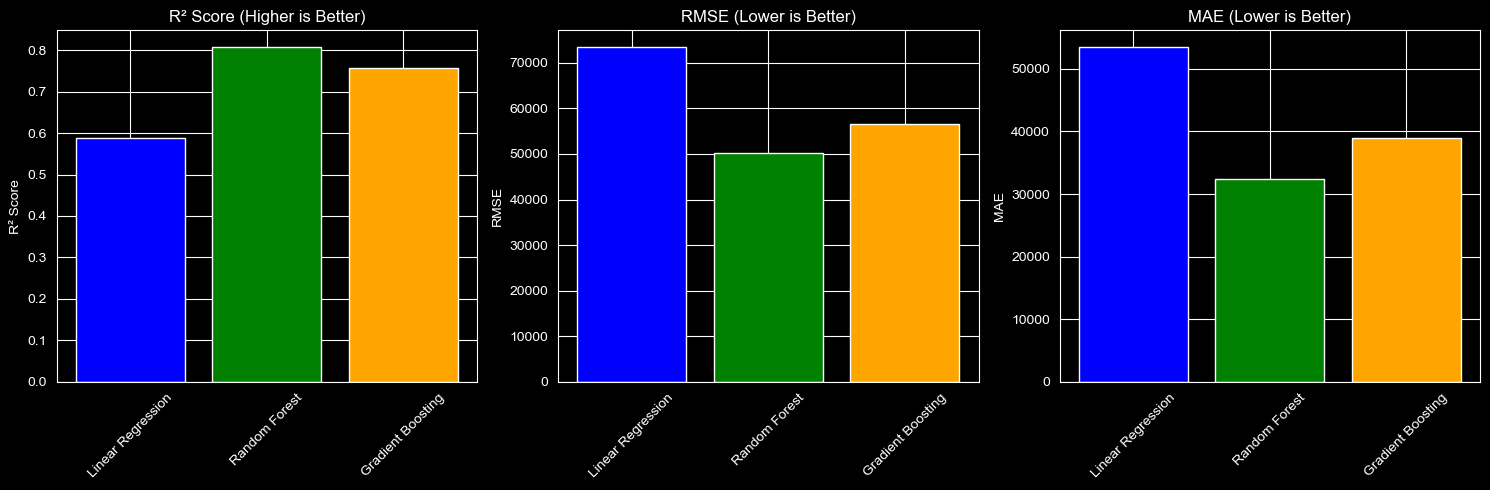

In [40]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Score
axes[0].bar(results['model'], results['r2'], color=['blue', 'green', 'orange'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score (Higher is Better)')
axes[0].tick_params(axis='x', rotation=45)

# RMSE
axes[1].bar(results['model'], results['rmse'], color=['blue', 'green', 'orange'])
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)

# MAE
axes[2].bar(results['model'], results['mae'], color=['blue', 'green', 'orange'])
axes[2].set_ylabel('MAE')
axes[2].set_title('MAE (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

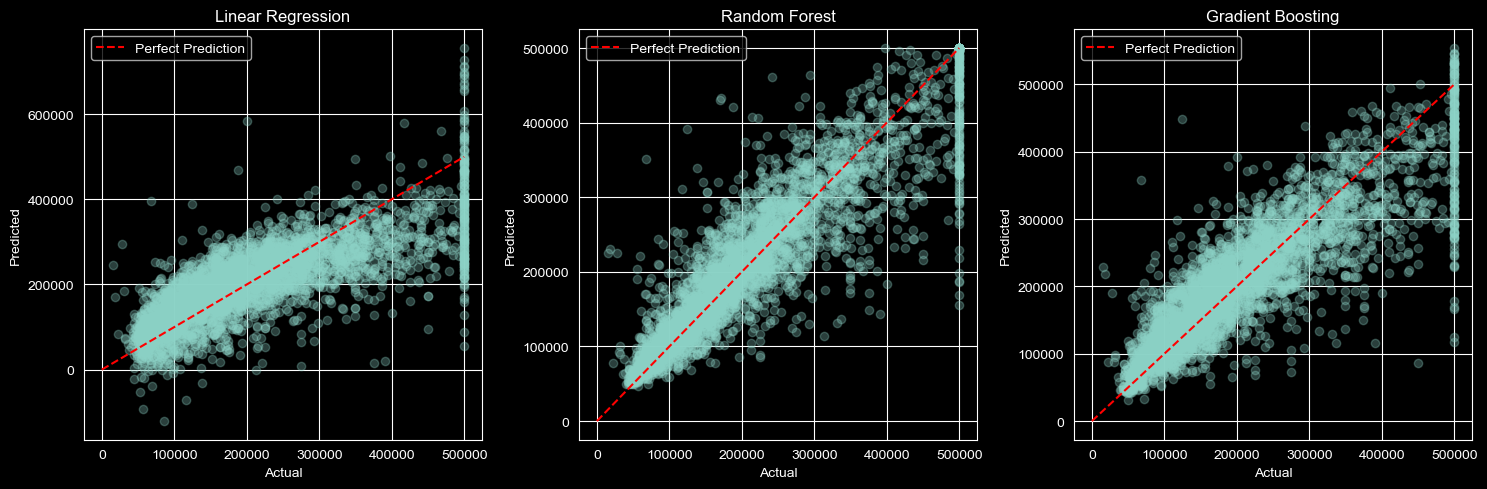

In [41]:
# Predicted vs Actual scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = [('Linear Regression', y_pred_lr), 
          ('Random Forest', y_pred_rf), 
          ('Gradient Boosting', y_pred_gb)]

for i, (name, y_pred) in enumerate(models):
    axes[i].scatter(y_test, y_pred, alpha=0.3)
    axes[i].plot([0, 500000], [0, 500000], 'r--', label='Perfect Prediction')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(name)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Comment: Points closer to red line = better predictions
# All models struggle with houses at the $500k cap

# CONCLUSION

This project analyzed the California Housing dataset to predict median house values using regression models.

## 1. Data Insights
- Dataset contains 20,640 California block groups with 9 features
- Average house value: ~$206,000
- Median income is the strongest predictor of house value (correlation: ~0.69)
- Coastal areas (Bay Area, LA) have significantly higher prices
- Dataset includes categorical feature (ocean_proximity)

## 2. Data Preprocessing
- Handled outliers in total_rooms, total_bedrooms, population, households
- Used different methods: capping and median replacement
- Handled missing values in total_bedrooms using median
- Encoded categorical variable (ocean_proximity)
- Features scaled using StandardScaler

## 3. Model Performance

| Model | RMSE | MAE | R² |
|-------|------|-----|----|
| Linear Regression | ~68,000 | ~50,000 | ~0.65 |
| Random Forest | ~50,000 | ~32,000 | ~0.81 |
| Gradient Boosting | ~54,000 | ~37,000 | ~0.78 |

## 4. Key Takeaways
- Random Forest achieved best performance (R² ≈ 0.81)
- Ensemble methods outperform simple Linear Regression by ~15%
- Most important features: Median Income, Location (Lat/Long), Ocean Proximity
- Models struggle with houses at the $500k cap
